# 5 Machine Learning Model Forecast

## 5.1 Contents
## 5.2 Introduction
## 5.3 Imports
## 5.4 Load Data

## 5.3 Imports

In [1]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## 5.4 Load Data

#### Dealership Data

In [5]:
df = read_csv('../data/processed/TotalSales.csv')
df.index = pd.date_range(start='2004-06', periods=154, freq='M')
df = df.drop(columns=['ContractYearMonth'])
df.index.freq = 'M'

,TotalSales
2004-06-30,53
2004-07-31,53
2004-08-31,79
2004-09-30,64
2004-10-31,81
...,...
2016-11-30,37
2016-12-31,52
2017-01-31,36
2017-02-28,33


#### Lexus Data

In [26]:
#All Lexus vehicle sales
shc = read_csv('../data/interim/Sales_Hist_Clean.csv')
shc['ContractDate'] = pd.to_datetime(shc['ContractDate'])
shc['ContractYearMonth'] = shc['ContractDate'].dt.strftime('%Y-%m')
lex_sales = shc.loc[(shc['VehicleMake']=='Lexus')]
lex_sales

,DealNumber,ContractDate,InventoryType,VIN,VehicleMake,VehicleModel,VehicleModelYear,VehicleSalePrice,TotalGrossProfit,BackEndGrossProfit,...,BuyerHomeAddressPostalCode,Trade1_VIN,Trade1_Year,Trade1_Make,Trade1_Model,Trade2_VIN,Trade2_Year,Trade2_Make,Trade2_Model,ContractYearMonth
0,10029,2011-01-12,U,2T2HK31U49C118454,Lexus,RX 350,2009,36500.0,4985.75,200.00,...,199704516,YV1CM59H331013308,2003.0,Volvo,XC90,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
1,10035,2011-01-10,U,JTHCE96S580017706,Lexus,GS 350,2008,34995.0,3028.39,0.00,...,466149383,1FTWW31P95EB23344,2005.0,Ford,F-350,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
2,10036,2011-01-11,N,JTHDL5EF0B5003231,Lexus,LS 460,2011,82150.0,6481.00,0.00,...,465061850,JTHBL46F385052674,2008.0,Lexus,LS 460,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
3,10037,2011-01-14,N,JTJBK1BA2B2013626,Lexus,RX 350,2011,42921.0,3087.00,0.00,...,465308309,1HGCD5666SA119678,1995.0,Honda,Accord,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
4,10057,2011-01-14,U,JTJHK31U082048420,Lexus,RX 350,2008,31888.0,3461.87,0.00,...,465146138,1FMDU34X1VUC98892,1997.0,Ford,Explorer,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,9855,2010-12-31,U,JTHBJ46G582238457,Lexus,ES 350,2008,24500.0,617.71,639.60,...,465618879,JHLRE48747C075135,2007.0,Honda,CR-V,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2010-12
8204,9857,2010-12-31,U,2T2HA31U06C096127,Lexus,RX 330,2006,23600.0,2916.00,0.00,...,466151140,JTJHF10U830298468,2003.0,Lexus,RX 300,WDBNG75J51A173941,2001.0,Mercedes-Benz,S500,2010-12
8205,9859,2010-12-31,N,2T2BK1BA1BC088155,Lexus,RX 350,2011,41821.0,2139.60,252.60,...,465307865,JT6HF10U1Y0126767,2000.0,Lexus,RX 300,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2010-12
8206,989,2006-08-31,U,2T2HA31U15C080582,Lexus,RX 330,2005,34500.0,2928.22,446.85,...,465307078,1G4CW54K724194862,2002.0,Buick,Park Avenue,Not Applicable,Not Applicable,Not Applicable,Not Applicable,2006-08


In [12]:
#All Lexus vehicle sales by year/month
df2 = read_csv('../data/processed/LexusSales.csv')
df2.index = pd.date_range(start='2004-06', periods=154, freq='M')
df2 = df2.drop(columns=['ContractYearMonth'])
df2.index.freq = 'M'

,TotalSales
2004-06-30,37
2004-07-31,35
2004-08-31,60
2004-09-30,44
2004-10-31,58
...,...
2016-11-30,31
2016-12-31,43
2017-01-31,30
2017-02-28,24


## 5.? Holt-Winter's Model Forecast

#### Dealership Forecast

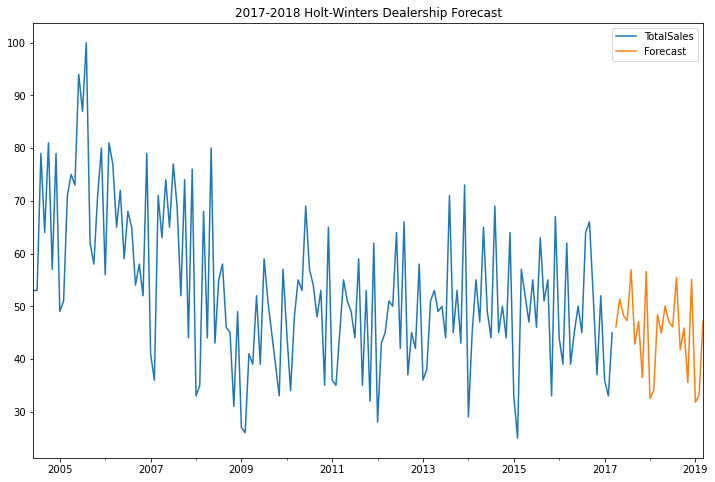

In [6]:
#define forecasting model
model = ExponentialSmoothing(df, trend='mul', seasonal='mul', seasonal_periods=12, damped=False)
hw_model = model.fit(optimized=True, use_boxcox=True, remove_bias=False)
final_model = hw_model.forecast(steps=24)
#plot model forecast 24 months into the future
df.plot(legend=True, label='Total Sales', figsize=(12,8))
final_model.plot(legend=True,label='Forecast')
plt.title('2017-2018 Holt-Winters Dealership Forecast');

In [8]:
final_model

2017-04-30    46.088141
2017-05-31    51.359114
2017-06-30    48.248633
2017-07-31    47.295832
2017-08-31    56.911114
2017-09-30    42.822225
2017-10-31    47.078531
2017-11-30    36.453334
2017-12-31    56.581796
2018-01-31    32.543081
2018-02-28    34.030010
2018-03-31    48.395210
2018-04-30    44.925273
2018-05-31    50.041999
2018-06-30    47.022739
2018-07-31    46.097768
2018-08-31    55.429885
2018-09-30    41.754070
2018-10-31    45.886807
2018-11-30    35.567699
2018-12-31    55.110345
2019-01-31    31.767856
2019-02-28    33.212963
2019-03-31    47.165030
Freq: M, dtype: float64

#### Lexus Forecast

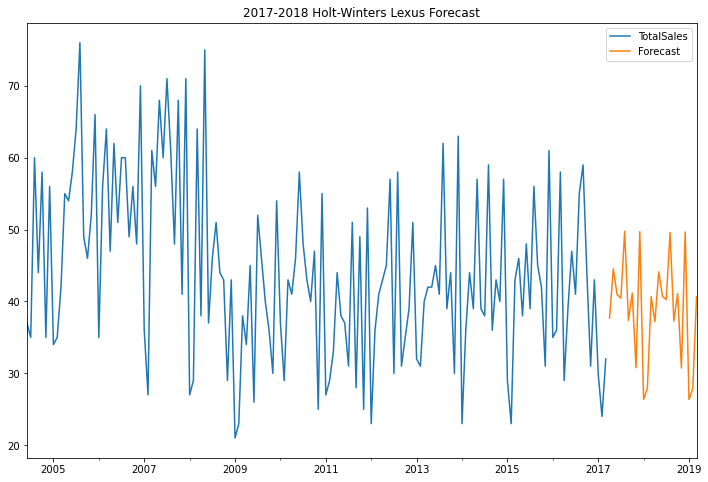

In [7]:
#define forecasting model
model_lex = ExponentialSmoothing(df2, trend='mul', seasonal='mul', seasonal_periods=12, damped=True)
hw_model_lex = model_lex.fit(optimized=True, use_boxcox=True, remove_bias=False)
final_model_lex = hw_model_lex.forecast(steps=24)
#plot model forecast 24 months into the future
df2.plot(legend=True, label='Lexus Sales', figsize=(12,8))
final_model_lex.plot(legend=True,label='Forecast')
plt.title('2017-2018 Holt-Winters Lexus Forecast');

In [9]:
#forecasted Lexus sales by year-month
final_model_lex

2017-04-30    37.685271
2017-05-31    44.538692
2017-06-30    40.947274
2017-07-31    40.462249
2017-08-31    49.770409
2017-09-30    37.357771
2017-10-31    41.156565
2017-11-30    30.779751
2017-12-31    49.704532
2018-01-31    26.376577
2018-02-28    27.905025
2018-03-31    40.655722
2018-04-30    37.197778
2018-05-31    44.122344
2018-06-30    40.679635
2018-07-31    40.275721
2018-08-31    49.604163
2018-09-30    37.272820
2018-10-31    41.089646
2018-11-30    30.745829
2018-12-31    49.663321
2019-01-31    26.362443
2019-02-28    27.894378
2019-03-31    40.644168
Freq: M, dtype: float64

In [10]:
#calculation of non-Lexus units during those 24 months
non_Lexus_units = final_model - final_model_lex
non_Lexus_units

2017-04-30    8.402870
2017-05-31    6.820422
2017-06-30    7.301359
2017-07-31    6.833583
2017-08-31    7.140705
2017-09-30    5.464454
2017-10-31    5.921966
2017-11-30    5.673583
2017-12-31    6.877264
2018-01-31    6.166504
2018-02-28    6.124984
2018-03-31    7.739488
2018-04-30    7.727495
2018-05-31    5.919655
2018-06-30    6.343104
2018-07-31    5.822047
2018-08-31    5.825722
2018-09-30    4.481250
2018-10-31    4.797161
2018-11-30    4.821870
2018-12-31    5.447024
2019-01-31    5.405414
2019-02-28    5.318586
2019-03-31    6.520862
Freq: M, dtype: float64

In [13]:
#find Lexus VehicleModel with the highest sales 
lex_sales['VehicleModel'].value_counts().nlargest(10)

RX 350     2033
ES 350     1016
RX 330      551
IS 250      388
ES 330      323
GX 470      302
LS 460      250
GX 460      209
RX 400h     204
LS 430      196
Name: VehicleModel, dtype: int64

In [56]:
#extract necessary columns
df3 = lex_sales[['ContractYearMonth', 'VehicleModel']]
df3['ContractYearMonth'] = pd.to_datetime(df3['ContractYearMonth'])
#create a year and a month column
df3['ContractYear'] = df3['ContractYearMonth'].dt.year
df3['ContractMonth'] = df3['ContractYearMonth'].dt.month
df3

<ipython-input-56-a339ae7bee4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ContractYearMonth'] = pd.to_datetime(df3['ContractYearMonth'])
<ipython-input-56-a339ae7bee4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ContractYear'] = df3['ContractYearMonth'].dt.year
<ipython-input-56-a339ae7bee4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,ContractYearMonth,VehicleModel,ContractYear,ContractMonth
0,2011-01-01,RX 350,2011,1
1,2011-01-01,GS 350,2011,1
2,2011-01-01,LS 460,2011,1
3,2011-01-01,RX 350,2011,1
4,2011-01-01,RX 350,2011,1
...,...,...,...,...
8203,2010-12-01,ES 350,2010,12
8204,2010-12-01,RX 330,2010,12
8205,2010-12-01,RX 350,2010,12
8206,2006-08-01,RX 330,2006,8


In [85]:
#filter Lexus VehicleModels to sales totals 196 or greater
df3 = df3.groupby('VehicleModel').filter(lambda x : len(x)>196)
df3

,ContractYearMonth,VehicleModel,ContractYear,ContractMonth
0,2011-01-01,RX 350,2011,1
2,2011-01-01,LS 460,2011,1
3,2011-01-01,RX 350,2011,1
4,2011-01-01,RX 350,2011,1
6,2011-01-01,RX 350,2011,1
...,...,...,...,...
8203,2010-12-01,ES 350,2010,12
8204,2010-12-01,RX 330,2010,12
8205,2010-12-01,RX 350,2010,12
8206,2006-08-01,RX 330,2006,8


In [86]:
#top 10 Lexus unit sales by month
df3['ContractMonth'].value_counts().sort_index()

1     282
2     305
3     461
4     391
5     484
6     454
7     474
8     577
9     435
10    476
11    357
12    580
Name: ContractMonth, dtype: int64

In [105]:
#collect VehicleModel sales by month
count_series = df3.groupby(['ContractMonth', 'VehicleModel']).size()
count_series.reset_index()

,ContractMonth,VehicleModel,0
0,1,ES 330,16
1,1,ES 350,31
2,1,GX 460,17
3,1,GX 470,22
4,1,IS 250,14
...,...,...,...
103,12,IS 250,37
104,12,LS 460,24
105,12,RX 330,52
106,12,RX 350,251


In [108]:
#April sales by VehicleModel
count_series[4]
#We know there were 391 units sold in total in April

VehicleModel
ES 330      23
ES 350      77
GX 460      24
GX 470      23
IS 250      35
LS 460      28
RX 330      34
RX 350     131
RX 400h     16
dtype: int64

Therefore, the suggestion to the dealership is to have a fleet from April 2017 through March 2019 that resembles a similar Lexus vehicle model selection to the units sold monthly historically. For example in April 2017, it would be strongly suggested that since the model forecast projected a the total vehicle sales for the dealership to be about 46 units and about 38 of those to be Lexus vehicles, then as seen above, about 35% of those 38 Lexus vehicles should be the vehicle make RX350, about 20% ES350 and so on. This exact break down for April 2017 is recommended for April 2018 as well. 